## Ejercicio 3

_Iris_ es el género de una planta herbácea con flores que se utilizan en decoración. Dentro de este género existen muy diversas especies, entre las que se han estudiado: _Iris setosa_, _Iris versicolor_ e _Iris virginica_ (ver Figura 2).

Estas tres especies pueden distinguirse según las dimensiones de sus pétalos y sépalos. Un grupo de investigadores ha recopilado la información correspondiente a las longitudes y anchos de los pétalos y sépalos de 50 plantas de cada especie. En el archivo `iris81_trn.csv` se encuentra el conjunto de entrenamiento, y en `iris81_tst.csv` el de prueba, generado a partir de estas mediciones (en cm), junto con un código binario que indica la clase de cada meustra (Especie) reconocida por el grupo de investigadores ([-1, -1, 1] = _setosa_, [-1, 1, -1] = _versicolor_, [1, -1, -1] = _virginica_).

Determine la estructura óptima de un perceptrón multicapa para resolver este problema. Explore cómo varía el desempeño al usar distintas tasas de aprendizaje, y para cada caso grafique las curvas de error cuadrático total y error de clasificación en función de las épocas de entrenamiento.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PerceptronMulticapa

def cargarCSV(csvRelativePath, delimeter = ',') -> np.ndarray[any]:
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

# ===== PARAMETROS =====
max_epocas = 100
target_error = 0.01

# leer archivos
trnFileIris = cargarCSV('./data/iris81_trn.csv')
tstFileIris = cargarCSV('./data/iris81_tst.csv')

# ===== TRAINING =====
x = trnFileIris[:,:-1]
yd = trnFileIris[:,-1]

# Definir variantes
η = [0.2, 0.1, 0.05, 0.01]
neuronas = [[1,1], [2,1], [3,1], [2,2,1], [3,2,1]]

redes: list[list[PerceptronMulticapa.PerceptronMulticapa]] = [[PerceptronMulticapa.PerceptronMulticapa(
    cant_entradas=x.shape[1],
    capas=neuronas[j],
    max_epocas=max_epocas,
    tasa_aprendizaje=η[i]
) for i in range(len(η))] for j in range(len(neuronas))]

# Entrenar
trnErr = [[redes[j][i].entrenar(x,yd) for i in range(len(η))] for j in range(len(neuronas))]

### Errores

In [5]:
# test
x_tst = tstFileIris[:,:-1]
yd_tst = tstFileIris[:,-1]
tstErr = [[redes[j][i].test(x_tst,yd_tst) for i in range(len(η))] for j in range(len(neuronas))]

from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Neuronas", "η", f"Training ({x.shape[0]} casos)", f"Testing ({x_tst.shape[0]} casos)"]

for j in range(len(neuronas)):
    str_neuronas = ""
    for n in neuronas[j]:
        str_neuronas += f"{n}, "
    for i in range(len(η)):
        table.add_row([str_neuronas, η[i], trnErr[j][i], tstErr[j][i]])

print(table)

+-----------+------+----------------------+--------------------+
|  Neuronas |  η   | Training (111 casos) | Testing (37 casos) |
+-----------+------+----------------------+--------------------+
|   1, 1,   | 0.2  |         0.0          |        0.0         |
|   1, 1,   | 0.1  |         0.0          |        0.0         |
|   1, 1,   | 0.05 |         0.0          |        0.0         |
|   1, 1,   | 0.01 |         0.0          |        0.0         |
|   2, 1,   | 0.2  |         0.0          |        0.0         |
|   2, 1,   | 0.1  |         0.0          |        0.0         |
|   2, 1,   | 0.05 |         0.0          |        0.0         |
|   2, 1,   | 0.01 |         0.0          |        0.0         |
|   3, 1,   | 0.2  |         0.0          |        0.0         |
|   3, 1,   | 0.1  |         0.0          |        0.0         |
|   3, 1,   | 0.05 |         0.0          |        0.0         |
|   3, 1,   | 0.01 |         0.0          |        0.0         |
| 2, 2, 1,  | 0.2  |     

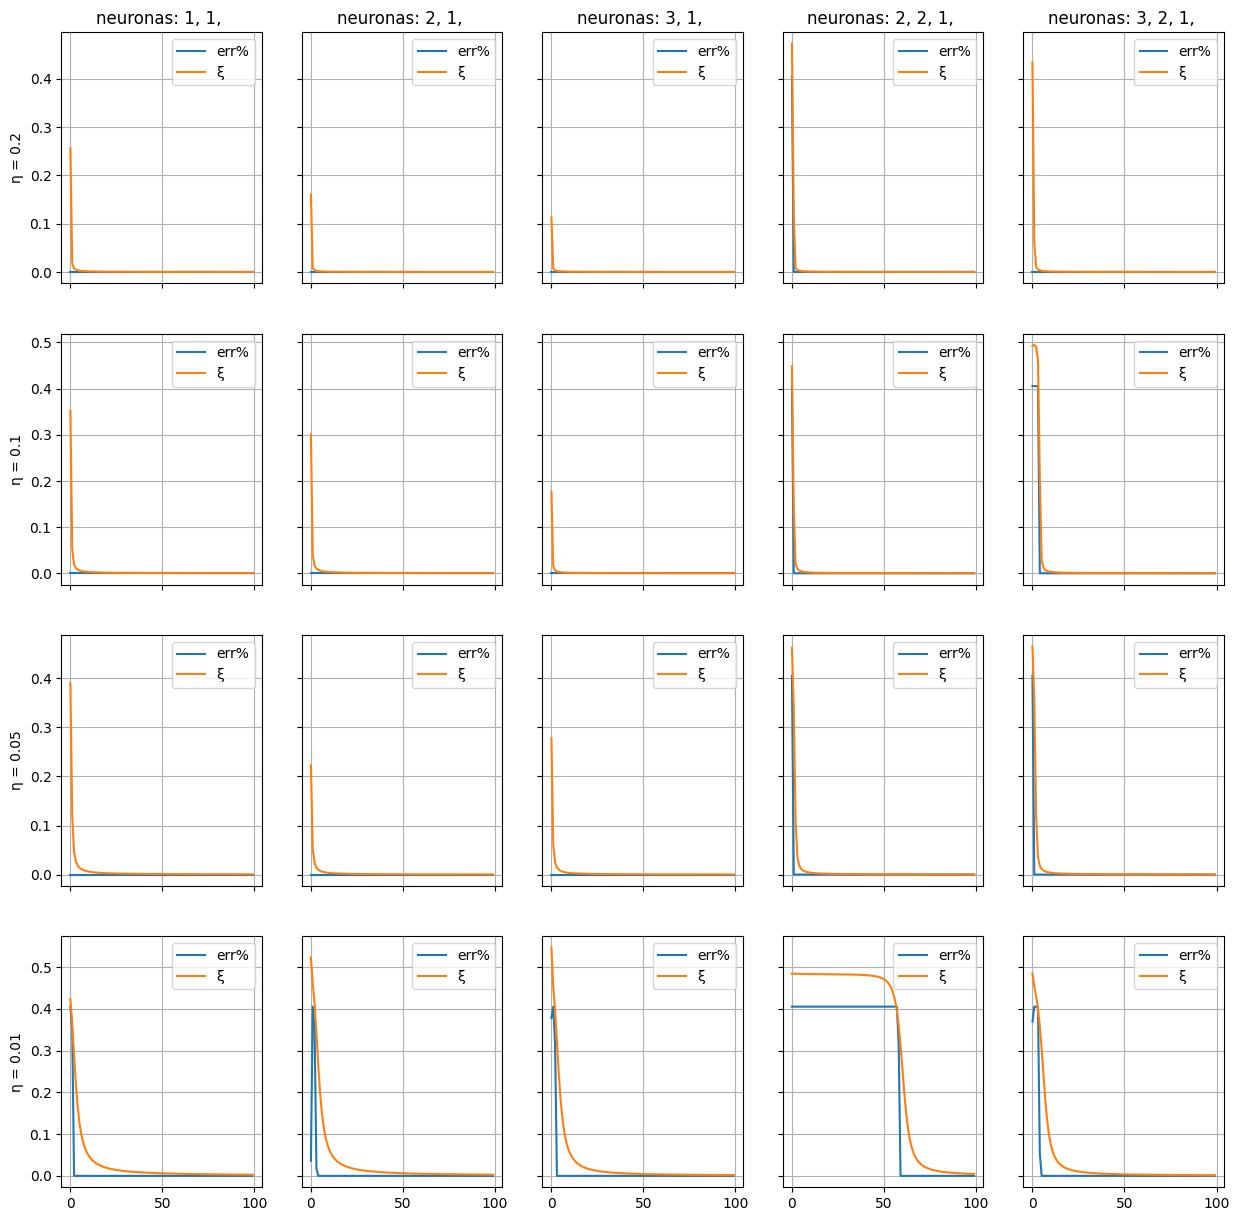

In [3]:
# Gráficas
fig, ax = plt.subplots(len(η), len(neuronas), sharex="col", sharey="row")
fig.set_figwidth(15)
fig.set_figheight(15)
for j in range(len(neuronas)):
    label = "neuronas: "
    for n in neuronas[j]:
        label += f"{n}, "
    ax[0,j].set_title(label)
    for i in range(len(η)):
        if j == 0:
            ax[i,j].set_ylabel(f"η = {η[i]}")
        ax[i,j].grid()
        ax[i,j].plot(redes[j][i].error_history, label="err%")
        ax[i,j].plot(redes[j][i].quaderror_history, label="ξ")
        ax[i,j].legend()

plt.show()